<a href="https://colab.research.google.com/github/uldom/Charity_Funding_Predictor/blob/main/Charity_Funding_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN','NAME'])




In [5]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
type(counts)
counts.index
list(counts[counts<500].index)

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace


['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [10]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
counts2 = application_df['CLASSIFICATION'].value_counts()
counts2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1570        1
C2190        1
C6100        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [20]:
# You may find it helpful to look at CLASSIFICATION value counts >1
counts3 = counts2[counts2>0]
counts3

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1570        1
C2190        1
C6100        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

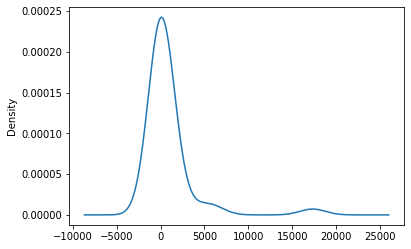

In [21]:
application_df.CLASSIFICATION.value_counts().plot.density()

In [22]:
type(counts3)
counts3.index
list(counts3[counts3<100].index)

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C2400',
 'C4100',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1246',
 'C1256',
 'C1234',
 'C3200',
 'C1267',
 'C2561',
 'C1236',
 'C1732',
 'C2380',
 'C8210',
 'C2150',
 'C1283',
 'C4500',
 'C4200',
 'C2500',
 'C1370',
 'C2600',
 'C1900',
 'C2170',
 'C1728',
 'C1580',
 'C1248',
 'C1820',
 'C5200',
 'C4120',
 'C1245',
 'C2570',
 'C1570',
 'C2190',
 'C6100',
 'C3700']

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
classification_types_to_replace = list(counts3[counts3<100].index)
classification_types_to_replace


['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C2400',
 'C4100',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1246',
 'C1256',
 'C1234',
 'C3200',
 'C1267',
 'C2561',
 'C1236',
 'C1732',
 'C2380',
 'C8210',
 'C2150',
 'C1283',
 'C4500',
 'C4200',
 'C2500',
 'C1370',
 'C2600',
 'C1900',
 'C2170',
 'C1728',
 'C1580',
 'C1248',
 'C1820',
 'C5200',
 'C4120',
 'C1245',
 'C2570',
 'C1570',
 'C2190',
 'C6100',
 'C3700']

In [24]:
# Replace in dataframe
for cla in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cla,"Other")


In [25]:
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64